# Week9 - Ensemble Assignment

- create a training and test set with random_state = 3
- create a pipeline to extract new features
- try bagging & boosting algorithms


#### here I have taken reference from the class notes....

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'

df = pd.read_csv(names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27999 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    27999 non-null  object
 1   gender  27999 non-null  object
dtypes: object(2)
memory usage: 656.2+ KB


In [3]:
X = df[['name']]
y = df.gender

In [4]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline

# class MyFeatures(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit( self, X, y = None ):
#         return self
    
#     def transform(self, X, y=None):
#         X['first_letter'] = [name[0] for name in X['name']]
#         X['last_letter'] = [name[-1] for name in X['name']]

#         return X[['first_letter', 'last_letter']].values

# pipe = Pipeline([ 
#     ("feature_engineering", MyFeatures()),
# #     ("selector_new", FeatureSelector(["daily_trend"])),
#     ("ohe", OneHotEncoder(handle_unknown="ignore"))
# ])

# Xmatrix = pipe.fit_transform(X, y)
# Xmatrix

In [5]:
# pipe[1].get_feature_names_out()

In [6]:
# pd.DataFrame(Xmatrix.toarray(), columns=pipe[1].get_feature_names_out(), dtype=int)

## EDA 

In [17]:
df

,name,gender,first_letter
0,jerilynn,F,J
1,percy,M,P
2,landry,M,L
3,reynalda,F,R
4,girl,F,G
...,...,...,...
27995,emelio,M,E
27996,holt,M,H
27997,silvestre,M,S
27998,annastacia,F,A


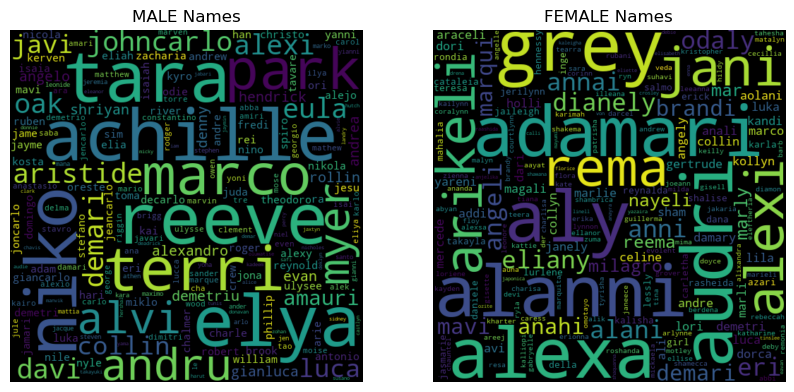

In [29]:
import seaborn as sns

# here i used Word cloud for names just for fun to see....
from wordcloud import WordCloud

# here i generated a word cloud for male names and female names....
male_n = ' '.join(df[df['gender'] == 'M']['name'])
wordcloud_m = WordCloud(width=500, height=500, random_state=3, max_font_size=100).generate(male_n)

female_n = ' '.join(df[df['gender'] == 'F']['name'])
wordcloud_f = WordCloud(width=500, height=500, random_state=3, max_font_size=100).generate(female_n)

# plotting for the word clouds...
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_m, interpolation="bilinear")
plt.title('MALE Names')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_f, interpolation="bilinear")
plt.title('FEMALE Names')
plt.axis('off')

plt.show()


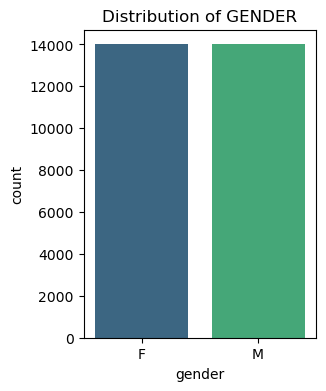

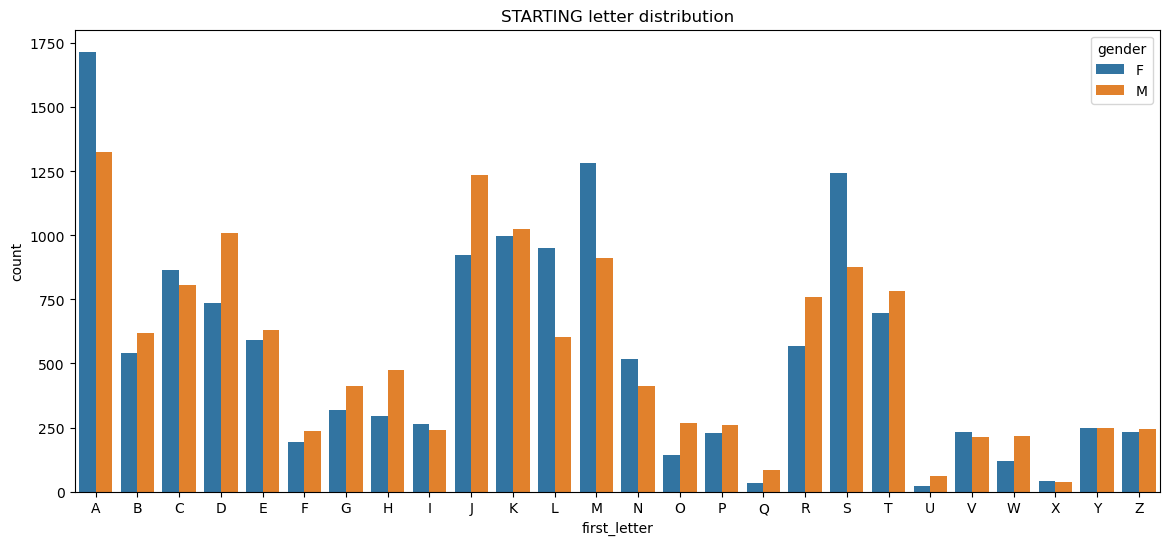

In [32]:
# BAR plot....
plt.figure(figsize=(3, 4))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribution of GENDER')
plt.show()

# BAR plot for the staring letter distribution...
df['first_letter'] = df['name'].apply(lambda x: x[0].upper())
plt.figure(figsize=(14, 6))
sns.countplot(x='first_letter', hue='gender', data=df, order=sorted(df['first_letter'].unique()))
plt.title('STARTING letter distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# here i created a training and test set with random_state=3 as asked in the question....
X_train, X_test, y_train, y_test = train_test_split(df['name'], df['gender'], test_size=0.2, random_state=3)



In [26]:
# here i created a pipeline to extract features using CountVectorizer and apply bagging and boosting algorithms to the model....
pipe_bagg = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char')),
    ('bagging', BaggingClassifier(n_estimators=50, random_state=3))
])

pipe_boos = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char')),
    ('boosting', AdaBoostClassifier(n_estimators=50, random_state=3))
])

pipe_boos

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char')),
                ('boosting', AdaBoostClassifier(random_state=3))])

In [27]:
pipe_bagg

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char')),
                ('bagging',
                 BaggingClassifier(n_estimators=50, random_state=3))])

In [28]:
# Here i put fit and predict using the bagging pipeline boosting pipeline....
pipe_bagg.fit(X_train, y_train)
y_pred_bagg = pipe_bagg.predict(X_test)

pipe_boos.fit(X_train, y_train)
y_pred_boos = pipe_boos.predict(X_test)

#here i evaluated the performance from the trianed model....
acc_bagg = accuracy_score(y_test, y_pred_bagg)
acc_boos = accuracy_score(y_test, y_pred_boos)

print(f'BAGGING Accuracy: {acc_bagg:.5f}')
print(f'BOOSTING Accuracy: {acc_boos:.5f}')


BAGGING Accuracy: 0.61839
BOOSTING Accuracy: 0.66321
